<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/1%20Linear%20Regression/Linear_Regression_Algorithm_Implementation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Algorithm and Implementation, Part 2

In [ ]:
%pip install \
  numpy==2.0.2 \
  pandas=2.2.2 \
  scikit-learn==1.6.1 \
  matplotlib==3.10.0 \

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing

## Linear Regression Algorithm for Multiple Features

### Notations

$m$: number of features

$n$: number of dataset

$X$: input data (independent variables) in matrix of $n \times m$

$y$: target value (dependent output variable), or true label, in matrix of $n \times 1$

$x^{(i)}, y^{(i)}$: $i$-th sample data and true label

$\hat{y}^{(i)}$: $i$-th predicted value

$x_j$: $j$-th feature, where $j \in [1, m]$

$\theta$: intercept and coefficient. Where $\theta_0$ is intercept; $\theta_j$ is $j$-th element\ of coefficient, $j \in [1, m]$

### Hypothesis Function

Multiple features means there are multiple input variables. If there are $m$ features, to make it simple, the number of dataset is 1, size of $X$ is $1 \times m$, then the hypothesis function is:

$\quad h_\theta(X) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_m x_m $

$x$ and $\theta$ can be represented by vectors,

$\quad X = \begin{bmatrix}1 & x_1 & x_2 & ... & x_m & \end{bmatrix}$, and $\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ ... \\ \theta_m \\ \end{bmatrix}$

Then the hypothesis function can be expressed as:

$\quad \begin{array}{rcl}
h_\theta(X) & = & X \cdot \theta \\
 & = & \begin{bmatrix}1 & x_1 & x_2 & ... & x_m & \end{bmatrix} \cdot \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ ... \\ \theta_m \\ \end{bmatrix}\\
 & = & \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_m x_m
\end{array}$



In practice, the number of dataset is $n$, instead of 1. Therefore, the size of $X$ is $n \times m$, the above formula is same.

What is ***fit_intercept***? 

For example $y=ax+b$, where $b$ is the intercept, or bias, it's the value at which the fitted line crosses the y-axis, or the $y$ value when $x = 0$. If the intercept is zero, the fitted line always passes through the origin point. In most of cases the data sets will not fit a line that passes the origin point, so it's important that a intercept is added to the model.

In the above Hypothesis Function, a $1$ is added to $x$ vector and a $\theta_0$ is added to $\theta$ vector, this tells the linear regression model to fit the intercept. If not to fit intercept, do not add them, then the Hypothesis Function is: 

$\quad \begin{array}{rcl}
h_\theta(X) & = & X \cdot \theta \\
 & = & \begin{bmatrix}x_1 & x_2 & ... & x_m & \end{bmatrix} \cdot \begin{bmatrix}\theta_1 \\ \theta_2 \\ ... \\ \theta_m \\ \end{bmatrix}\\
 & = & \theta_1 x_1 + \theta_2 x_2 + ... + \theta_m x_m
\end{array}$

### Data Scaling

When dealing with multiple features/variables, the data ranges for some features are totally different from others, for example in the housing dataset the feature of number of bedrooms could be ranging from 1 to 6, while the feature of area in square feet could be ranging from 500 to 5000. This difference could cause imbalance and inaccurate when performing the mathematical calculations, and sometimes could cause data type overflow in the calculation.

For these reasons, it's always a best practice to scale the data for each feature so that they are all within the same range, for example -1 to 1, or 0 to 1. There are different methods scaling the data, this is the Standard Scalar:

$\quad X_{scaled} = \displaystyle\frac{X_{raw} - \mu }{\sigma}$

where $\mu$ is the mean of the sample data for each feature, and $\sigma$ is the standard deviation of the sample data for each feature.

### Cost Function

$\quad \begin{array}{rcl}
J(\theta) & = & \displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)} )^2 \\
 & = & \displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} (y^{(i)} - h_\theta(X))^2 
\end{array}$

where $n$ is the number of dataset, i.e. number of data points.

Note, the square of summation can be calculated by vector/matrix as below:

$\quad \begin{array}{rcl}
\displaystyle\sum_{i=1}^{n} a_i^2 & = & a^T \cdot a \\
 & = & \begin{bmatrix}a_1 & a_2 & ... & a_n & \end{bmatrix} \cdot \begin{bmatrix}a_1 \\ a_2 \\ ... \\ a_n & \end{bmatrix} \\
 & = & a_1^2 + a_2^2 + ... +a_n^2
\end{array}$


###  Gradient

The partial derivative of the cost function $J(\theta)$ is,

$\quad  \displaystyle\frac{\partial J( \theta ) }{\partial \theta_0} = \frac{\mathrm{2} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} )  \qquad\qquad\qquad \textrm{ (where j = 0) }$

$\quad  \displaystyle\frac{\partial J( \theta ) }{\partial \theta_j} = \frac{\mathrm{2} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) x_j^{(i)}  \qquad\qquad\space\space  \textrm{ (where j } \in [1, m])$ 


The gradient is a vector, each element is the partial derivative of a variable.

$\quad \nabla J(\theta) = \begin{bmatrix}
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_0} \\ 
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_1}  \\ 
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_2} \\ 
... \\
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_m} \\ \end{bmatrix} = 
\begin{bmatrix}
\displaystyle\frac{\mathrm{2} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) \\ 
\displaystyle\frac{\mathrm{2} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) x_1^{(i)}  \\ 
\displaystyle\frac{\mathrm{2} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) x_2^{(i)} \\ 
... \\
\displaystyle\frac{\mathrm{2} }{n}  \sum_{i=1}^{n} ( h_\theta(x^{(i)}) - y^{(i)} ) x_m^{(i)} \\ \end{bmatrix}$

## Implementation for Multiple Variable

In [ ]:
class LinearRegression:
    def __init__(self, X , y, fit_intercept=True):
        self.y = y.reshape(-1, 1)
        self.X = self.scale(X)
        if fit_intercept:
            self.X = np.hstack((np.ones((self.X.shape[0],1)), self.X))
        # self.theta = np.ones((self.X.shape[1], 1))
        self.theta = np.zeros((self.X.shape[1], 1))
        self.fit_intercept = fit_intercept
        self.cost_history = []
        self.epoch_history = []

    def scale(self, X):
        return (X - np.mean(X, axis=0))/np.std(X, axis=0)

    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0],1)), X))
        return np.matmul(X, self.theta)

    def __predict(self):
        return np.matmul(self.X, self.theta)

    def gradient(self):
        n = self.X.shape[0]
        d = self.__predict() - self.y
        return( (2/n) * np.dot(np.transpose(self.X), d) )

    def cost(self):
        y_pred = self.__predict()
        cost_ = np.average((self.y - y_pred) ** 2, axis=0)
        return(cost_.item())
        # return( metrics.mean_squared_error(self.y, y_pred) )

    def fit(self, epochs, alpha):
        #Gradient Descent process
        for i in range(epochs):
            y_pred = self.__predict()
            self.theta = self.theta - alpha * self.gradient()
            self.epoch_history.append(i)
            self.cost_history.append(self.cost())

    def score(self):
        y_pred = self.__predict()
        y_mean = np.average(self.y, axis=0)
        u = ((self.y - y_pred) ** 2).sum(axis=0, dtype=np.float64)
        v = ((self.y - y_mean) ** 2).sum(axis=0, dtype=np.float64)
        score_ = 1 - (u/v)
        return(score_.item())


In [ ]:
# Generate sample data
X, y = datasets.make_regression(n_samples=5000,   #number of samples
                                n_features=8,     #number of features
                                noise=30,         #bias and standard deviation of the guassian noise
                                random_state=0)   #set for same data points for each run


In [ ]:
lr = LinearRegression(X, y)
lr.fit(epochs=8000, alpha=0.0005)
theta = pd.Series(np.hstack(lr.theta))
print("Intercept:")
print(theta[0:1].to_string())
print("Coefficient:")
print(theta[1:].to_string())
print("Cost:", lr.cost())
print("Score:", lr.score())

Intercept:
0   -1.437462
Coefficient:
1    93.063535
2    54.814060
3    82.108192
4    71.601580
5     7.885793
6    37.073841
7    33.776433
8    45.269625
Cost: 878.4499520973873
Score: 0.9704361325795118


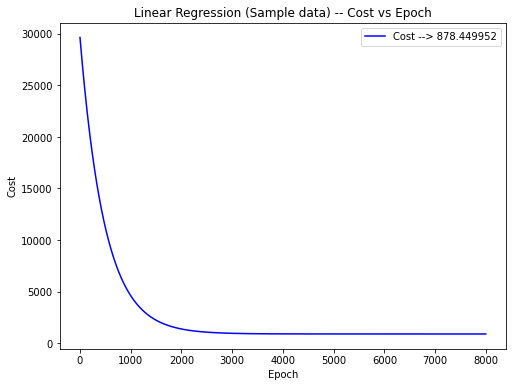

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.title(r'Linear Regression (Sample data) -- Cost vs Epoch')

plt.plot(lr.epoch_history, lr.cost_history, color='b', label="Cost --> %f"%lr.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("linear_regression_multi_feature1.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Compare with *sklearn.linear_model.LinearRegression()*.

In [ ]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(X, y)
# Print results
intc_ = pd.Series(model.intercept_)
coef_ = pd.Series(model.coef_)
coef_.index = coef_.index + 1
print("Intercept:")
print(intc_.to_string())
print("Coefficient:")
print(coef_.to_string())
print("Cost:", metrics.mean_squared_error(y, model.predict(X)))
print("Score:", model.score(X, y) )

Intercept:
0    0.468012
Coefficient:
1    95.138104
2    55.724115
3    81.391803
4    72.601130
5     7.805795
6    36.949831
7    33.840377
8    45.218454
Cost: 878.4473847878311
Score: 0.9704362189812461


## Linear Regression on Diabetes Dataset

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
diab = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diab['target'] = diabetes.target
X1 = diab.loc[:, diabetes.feature_names].values
y1 = diabetes.target

In [ ]:
lr1 = LinearRegression(X1, y1)
lr1.fit(epochs=20000, alpha=0.01)

#Print results
theta = np.hstack(lr1.theta)
coefficient = pd.Series(theta[1:], index = diabetes.feature_names)
intercept = theta[0]
print("Intercept:")
print(intercept)
print("Coefficients:")
print(coefficient.to_string())
print("Score:", lr1.score() )
print("Cost:", lr1.cost())

Intercept:
152.13348416289526
Coefficients:
age    -0.470798
sex   -11.400935
bmi    24.739992
bp     15.424315
s1    -36.498399
s2     21.738619
s3      4.277573
s4      8.271220
s5     35.294306
s6      3.220959
Score: 0.5177454221077613
Cost: 2859.7141379090785


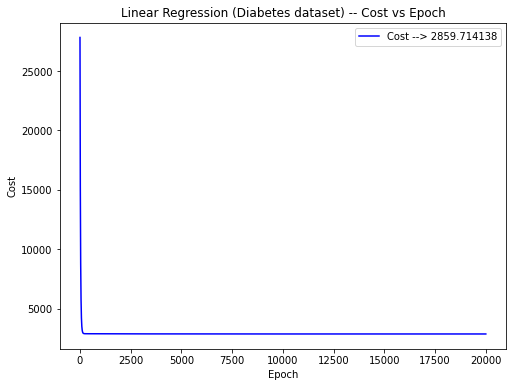

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.title(r'Linear Regression (Diabetes dataset) -- Cost vs Epoch')

plt.plot(lr1.epoch_history, lr1.cost_history, color='b', label="Cost --> %f"%lr1.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("linear_regression_multi_feature2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Compare with sklearn.linear_model.LinearRegression().

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(X1, y1)

#Print results
coefficient = pd.Series(model1.coef_, index = diabetes.feature_names)
intercept = model.intercept_
print("Intercept:")
print(intercept)
print("Coefficients:")
print(coefficient.to_string())
print("Score:", model1.score(X1, y1) )
print("Cost:", metrics.mean_squared_error(y1, model1.predict(X1)))

Intercept:
0.4680115938089713
Coefficients:
age    -10.012198
sex   -239.819089
bmi    519.839787
bp     324.390428
s1    -792.184162
s2     476.745838
s3     101.044570
s4     177.064176
s5     751.279321
s6      67.625386
Score: 0.5177494254132934
Cost: 2859.6903987680657
